<a href="https://colab.research.google.com/github/alezmartineza/Experimentos-Python/blob/main/Modelo_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

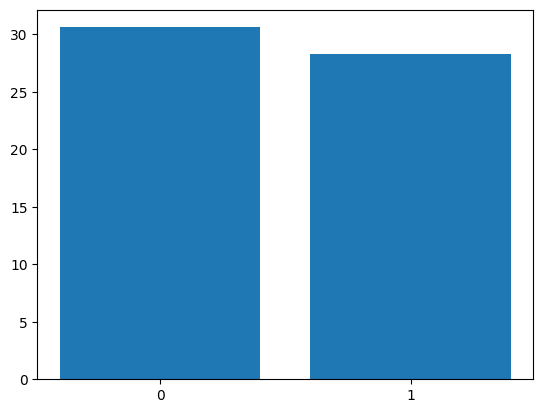

In [ ]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
# leer train.csv
df = pd.read_csv("/train.csv")
# agrupar por los que sobreviven y sacar promedio de edad
# y guardarlo en un dataframe llamado plot_df
plot_df = df.groupby("Survived")["Age"].mean().reset_index()
# crear un gráfico de barras
plt.bar(x = "Survived", height="Age", data = plot_df)
plt.xticks([0,1], [0,1])
plt.show()

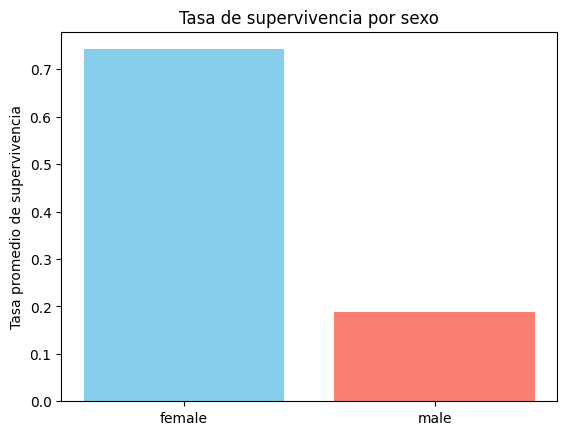

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/train.csv")
# Agrupar por sexo y calcular la tasa promedio de supervivencia
plot_sex = df.groupby("Sex")["Survived"].mean().reset_index()

# Crear un gráfico de barras
plt.bar(x="Sex", height="Survived", data=plot_sex, color=['skyblue', 'salmon'])
plt.title("Tasa de supervivencia por sexo")
plt.ylabel("Tasa promedio de supervivencia")
plt.show()

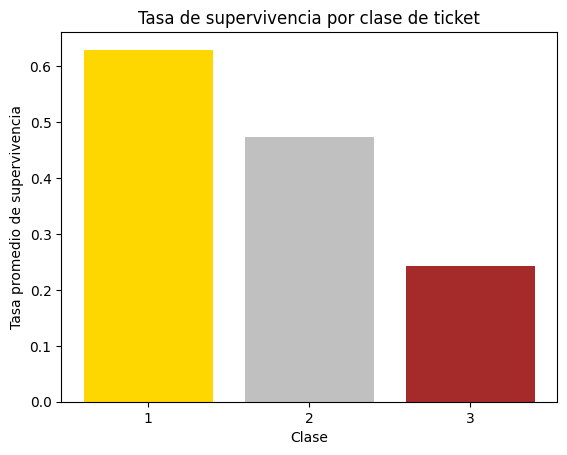

In [ ]:
# Agrupar por clase de boleto y calcular tasa promedio de supervivencia
plot_class = df.groupby("Pclass")["Survived"].mean().reset_index()

# Crear un gráfico de barras
plt.bar(x="Pclass", height="Survived", data=plot_class, color=['gold', 'silver', 'brown'])
plt.title("Tasa de supervivencia por clase de ticket")
plt.xlabel("Clase")
plt.ylabel("Tasa promedio de supervivencia")
plt.xticks([1, 2, 3])
plt.show()


In [ ]:
import pandas as pd

# Cargar los datasets
train_df = pd.read_csv("/train.csv")
test_df = pd.read_csv("/test.csv")

In [ ]:
# Guardamos las columnas que usaremos
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# Combinamos train y test temporalmente para procesar igual
test_passenger_ids = test_df['PassengerId']  # para la entrega final
combined = pd.concat([train_df[features], test_df[features]], axis=0)


In [ ]:
# Convertir sexo a 0 (male) y 1 (female)
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})


In [ ]:
# Rellenar NaN en Age y Fare con la mediana
combined['Age'] = combined['Age'].fillna(combined['Age'].median())
combined['Fare'] = combined['Fare'].fillna(combined['Fare'].median())


In [ ]:
X_train = combined[:len(train_df)]
X_test = combined[len(train_df):]
y_train = train_df['Survived']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predecir en el conjunto de test
predictions = model.predict(X_test)


In [ ]:
# Crear el DataFrame para el envío
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

# Guardar el archivo de envío
submission.to_csv("mi_envio_titanic.csv", index=False)

In [ ]:
# Predecir en el conjunto de test
predictions = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por sexo y calcular el promedio de supervivencia
sex_survival = train_df.groupby("Sex")["Survived"].mean().reset_index()

# Mostrar el resultado
print(sex_survival)


      Sex  Survived
0  female  0.742038
1    male  0.188908


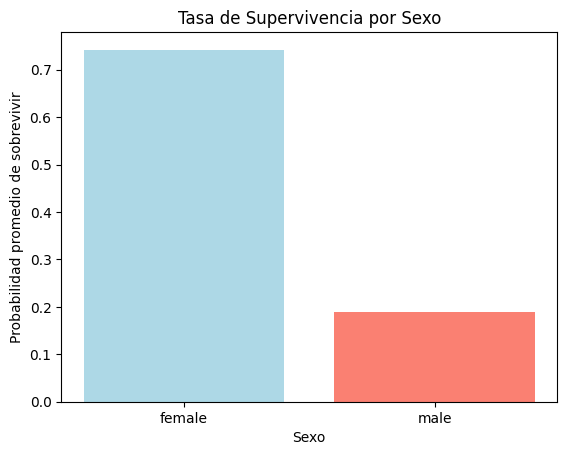

In [ ]:
plt.bar(sex_survival["Sex"], sex_survival["Survived"], color=["lightblue", "salmon"])
plt.title("Tasa de Supervivencia por Sexo")
plt.ylabel("Probabilidad promedio de sobrevivir")
plt.xlabel("Sexo")
plt.show()


In [ ]:
class_survival = train_df.groupby("Pclass")["Survived"].mean().reset_index()
print(class_survival)


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


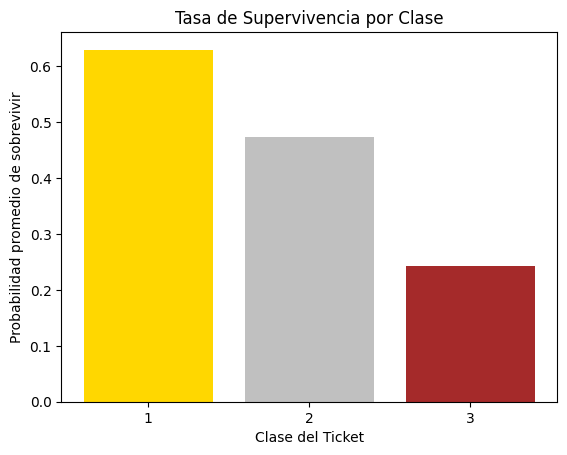

In [ ]:
plt.bar(class_survival["Pclass"], class_survival["Survived"], color=["gold", "silver", "brown"])
plt.title("Tasa de Supervivencia por Clase")
plt.ylabel("Probabilidad promedio de sobrevivir")
plt.xlabel("Clase del Ticket")
plt.xticks([1, 2, 3])
plt.show()
